# Proyek Analisis Data: Nama dataset
- Nama: Nanda Prabu Angganata
- Email: nandaprabuangganata@gmail.com
- Id Dicoding: nanda_prabu

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Bagaimana tingkat penyewaan sepeda di setiap musimnya?
- pertanyaan 2 : Bagaimana tingkat perbandingan penyewaan sepeda di hari kerja dan hari libur?
- Pertanyaan 3 : Bagaimana perbandingan antara member dan bukan?
- Pertanyaan 4 : Bagaimana rata rata suhu dalam tiap bulan ?
- Pertanyaan 5 : Bagaimana hubungan antara temperatur dengan jumlah penyewa?
- Pertanyaan 6 : Bagaimana tingkat penyewaan sepeda di setiap jamnya?

## Menyiapkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv("/content/drive/MyDrive/DICODING/Belajar Analisis Data dengan Python/Dataset/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df_hour = pd.read_csv("/content/drive/MyDrive/DICODING/Belajar Analisis Data dengan Python/Dataset/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Penjelasan dari masing - masing kolom :


*   instant: record index
*   dteday : date
*   season : season (1:springer, 2:summer, 3:fall, 4:winter)
*   yr : year (0: 2011, 1:2012)
*   mnth : month ( 1 to 12)
*   hr : hour (0 to 23)
*   holiday : weather day is holiday or not
*   weekday : day of the week
*   workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
*   weathersit : (1: Clear, Few clouds, Partly cloudy, Partly cloudy, 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*   temp : Normalized temperature in Celsius. The values are divided to 41 (max)
*   atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
*   hum: Normalized humidity. The values are divided to 100 (max)
*   windspeed: Normalized wind speed. The values are divided to 67 (max)
*   casual: count of casual users
*   registered: count of registered users
*   cnt: count of total rental bikes including both casual and registered

### Assessing Data

#### Assement data day

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika diperhatikan, semua tipe data pada masing - masing kolom sudah tepat, kecuali kolom dteday yang seharusnya bertipe datetime.

In [5]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak ditemukan missing value pada baris data

In [6]:
print("Jumlah data terduplikasi: ", df_day.duplicated().sum())

Jumlah data terduplikasi:  0


tidak ditemukan data yang terduplikasi

In [7]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Jika diperhatikan tidak ada kejanggalan pada data

#### Assesment Data Hour

In [8]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Memiliki kasus sama dengan data day, pada data hour kolom dteday seharusnya bertipe datetime

In [9]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan baris data yang bernilai null

In [10]:
print("Jumlah data terduplikasi: ", df_hour.duplicated().sum())

Jumlah data terduplikasi:  0


Tidak ditemukan data yang terduplikasi

In [11]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


sama seperti data day, tidak ada kejanggalan pada data hour

### Cleaning Data

#### Cleaning Data Day

In [12]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

In [13]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Tipe data dari masing - masing kolom pada data day sudah sesuai dengan yang seharusnya

#### Cleaning Data Hour

In [14]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [15]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Tipe data dari masing - masing kolom pada data hour sudah sesuai dengan yang seharusnya

## Exploratory Data Analysis (EDA)

#### Eksplore data Day

In [16]:
df_day.describe(include="all")

<ipython-input-16-202ba9014e68>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_day.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Berdasarkan data tersebut dapat diketahui dalam 731 hari, rata - rata total penyewa sepeda dalam sehari yaitu 4504. dengan total penyewa sepeda terbanyak dalam sehari mencapai 8714. sedangkan dalam sehari jumlah penyewa paling sedikit yaitu 20 penyewa saja.

In [17]:
df_day.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["sum","min", "max", "mean"]})

instant      cnt                         
       nunique      sum   min   max         mean
season                                          
1          181   471348   431  7836  2604.132597
2          184   918589   795  8362  4992.331522
3          188  1061129  1115  8714  5644.303191
4          178   841613    22  8555  4728.162921

Berdasarkan data tersebut dapat diketahui walaupun jumlah season 1(springer) lebih banyak dari pada season 4(winter), tetapi jumlah total penyewa sangat berbeda cukup jauh.

In [18]:
df_day.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": ['sum',"min","max","mean"]
})

instant     cnt                         
        nunique     sum   min   max         mean
weekday                                         
0           105  444027   605  8227  4228.828571
1           105  455503    22  7525  4338.123810
2           104  469109   683  7767  4510.663462
3           104  473048   441  8173  4548.538462
4           104  485395   431  7804  4667.259615
5           104  487790  1167  8362  4690.288462
6           105  477807   627  8714  4550.542857

Berdasarkan data tersebut dapat kita ketahui penyewa sepeda paling banyak yaitu pada hari ke-6 dengan total 487.790.

In [19]:
df_day.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": ["sum", "min", "max", "mean",]
})

instant      cnt                        
           nunique      sum  min   max         mean
workingday                                         
0              231  1000269  605  8714  4330.168831
1              500  2292410   22  8362  4584.820000

Berdasarkan data dapat diketahui jumlah penyewa lebih banyak pada hari kerja daripada hari libur.

In [20]:
df_day.groupby(by="mnth").agg({
    "instant": "nunique",
    "temp": ["min", "max", "mean"],
    "hum" : ["min", "max", "mean"],
    "windspeed" : ["min", "max", "mean"]})

instant      temp                           hum                      \
     nunique       min       max      mean       min       max      mean   
mnth                                                                       
1         62  0.059130  0.425000  0.236444  0.311250  0.911250  0.585828   
2         57  0.127500  0.521667  0.299226  0.187917  0.929167  0.567465   
3         62  0.198333  0.601667  0.390539  0.000000  0.948261  0.588475   
4         60  0.300000  0.664167  0.469999  0.254167  0.888333  0.588063   
5         62  0.414167  0.775000  0.594798  0.360417  0.922500  0.688958   
6         60  0.540833  0.834167  0.684097  0.305000  0.833333  0.575806   
7         62  0.595833  0.861667  0.755470  0.396250  0.865417  0.597876   
8         62  0.635833  0.793333  0.708582  0.415000  0.850000  0.637730   
9         60  0.469167  0.753333  0.616485  0.467083  0.972500  0.714714   
10        62  0.254167  0.657500  0.485012  0.463333  0.906250  0.693761   
11        60  0.245833  0.530000  0.369220  0.333478  0.962500  0.624876   
12        62  0.215833  0.475833  0.324031  0.441250  0.970417  0.666041   

     windspeed                      
           min       max      mean  
mnth                                
1     0.073396  0.415429  0.206303  
2     0.045408  0.507463  0.215684  
3     0.089558  0.441563  0.222699  
4     0.065929  0.388067  0.234482  
5     0.074637  0.342667  0.182989  
6     0.077125  0.347642  0.185420  
7     0.080850  0.284813  0.166059  
8     0.070283  0.375617  0.172918  
9     0.050379  0.357587  0.165945  
10    0.022392  0.422275  0.175205  
11    0.046650  0.376871  0.183801  
12    0.047275  0.407346  0.176609

Berdasarkan data tersebut menunjukkan temperature terendah yaitu pada bulan pertama, dan rata rata temperature tertinggi pada bulan ketujuh.

In [21]:
df_day.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431


Berdasarkan data tersebut jumlah penyewa terbanyak yaitu pada tanggal 2012-09-15 dan jumlah penyewa paling sedikit yaitu pada 2012-10-29

#### Eksplore Data Hour

In [22]:
df_hour.describe(include="all")

<ipython-input-22-29824b046db5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_hour.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [23]:
df_hour.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ['sum',"min","max","mean"]})

instant     cnt                     
   nunique     sum min  max        mean
hr                                     
0      726   39130   2  283   53.898072
1      724   24164   1  168   33.375691
2      715   16352   1  132   22.869930
3      697    8174   1   79   11.727403
4      697    4428   1   28    6.352941
5      717   14261   1   66   19.889819
6      725   55132   1  213   76.044138
7      727  154171   1  596  212.064649
8      727  261001   5  839  359.011004
9      727  159438  14  426  219.309491
10     727  126257   8  539  173.668501
11     727  151320  10  663  208.143054
12     728  184414   3  776  253.315934
13     729  184919  11  760  253.661180
14     729  175652  12  750  240.949246
15     729  183149   7  750  251.233196
16     730  227748  11  783  311.983562
17     730  336860  15  976  461.452055
18     728  309772  23  977  425.510989
19     728  226789  11  743  311.523352
20     728  164550  11  567  226.030220
21     728  125445   6  584  172.314560
22     728   95612   9  502  131.335165
23     728   63941   2  256   87.831044

Berdasarkan data tersebut dapat diketahui jumlah rata rata penyewa terbanyak yaitu pada pukul 17 dan jumlah rata rata penyewa paling sedikit yaitu pada pukul 4.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tingkat penyewaan sepeda di setiap musimnya?

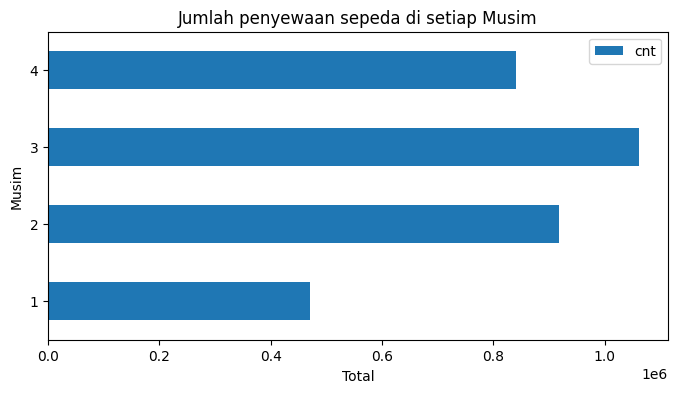

In [24]:
seasonal = df_day.groupby(by="season").agg({"cnt": "sum"})

seasonal.plot.barh(title = "Jumlah penyewaan sepeda di setiap Musim",
                   ylabel='Musim',
                   xlabel="Total",
                   figsize=(8, 4),
                   )
plt.show()

### Pertanyaan 2: Bagaimana tingkat perbandingan penyewaan sepeda di hari kerja dan hari libur?

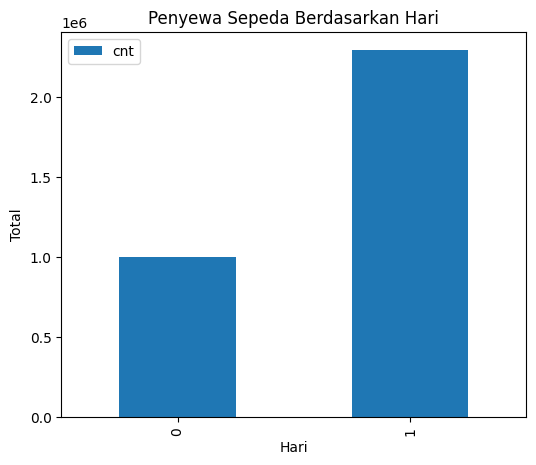

In [25]:
daily = df_day.groupby(by="workingday").agg({"cnt": "sum"})

daily.plot.bar(title="Penyewa Sepeda Berdasarkan Hari",
               ylabel='Total',
               xlabel="Hari",
               figsize=(6, 5),)
plt.show()

### Pertanyaan 3 : Bagaimana perbandingan antara member dan bukan?

<function matplotlib.pyplot.show(close=None, block=None)>

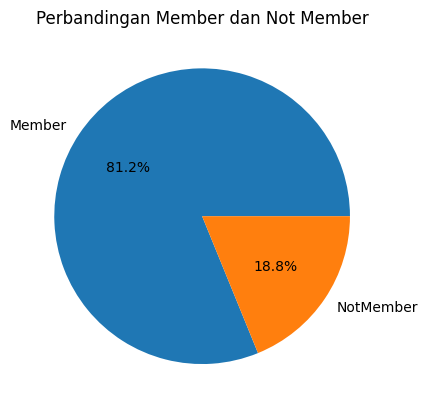

In [26]:
member = sum(df_day['registered'])
NotMember = sum(df_day['casual'])
gabung = [member,NotMember]
label = ["Member", "NotMember"]
plt.title('Perbandingan Member dan Not Member')
plt.pie(gabung, labels = label, autopct='%1.1f%%')
plt.show

### Pertanyaan 4 : Bagaimana rata rata suhu dalam tiap bulan ?

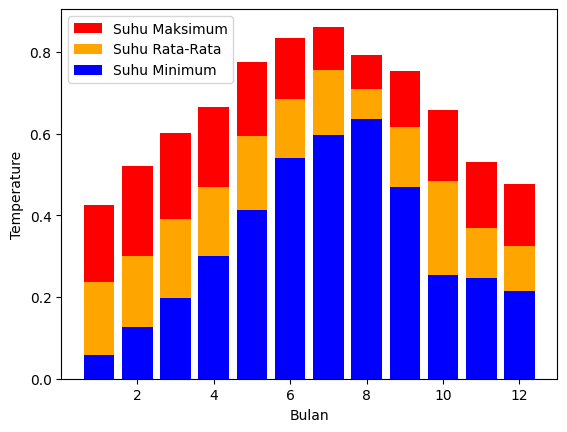

In [27]:
suhu = df_day.groupby(by="mnth").agg({"temp": ["min","max","mean"]})
bulan = df_day['mnth'].unique()
tempmean= suhu['temp']['mean']
tempmin = suhu['temp']['min']
tempmax = suhu['temp']['max']

plt.bar(x = bulan, height=tempmax, color="red")
plt.bar(x = bulan, height=tempmean, color="orange")
plt.bar(x = bulan, height=tempmin, color="blue")
plt.xlabel('Bulan')
plt.ylabel('Temperature')
plt.legend(['Suhu Maksimum','Suhu Rata-Rata','Suhu Minimum'],loc = 'upper left')
plt.show()

### Pertanyaan 5: Bagaimana hubungan antara temperatur dengan jumlah penyewa?

<ipython-input-28-ae7660321cdb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_baru.corr(method='pearson').round(2)


<Axes: title={'center': 'Korelasi jumlah penyewa dengan variabel lain'}>

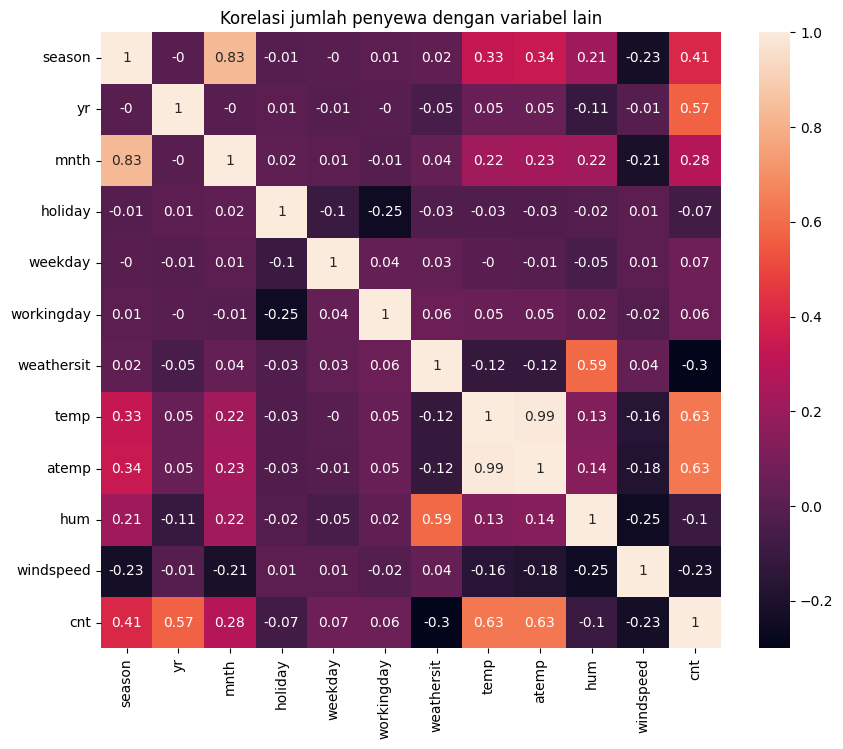

In [28]:
df_baru = df_day.drop(['instant','casual','registered'], axis="columns")
corr = df_baru.corr(method='pearson').round(2)
plt.figure(figsize=(10, 8))
plt.title("Korelasi jumlah penyewa dengan variabel lain")
sns.heatmap(corr, annot=True)

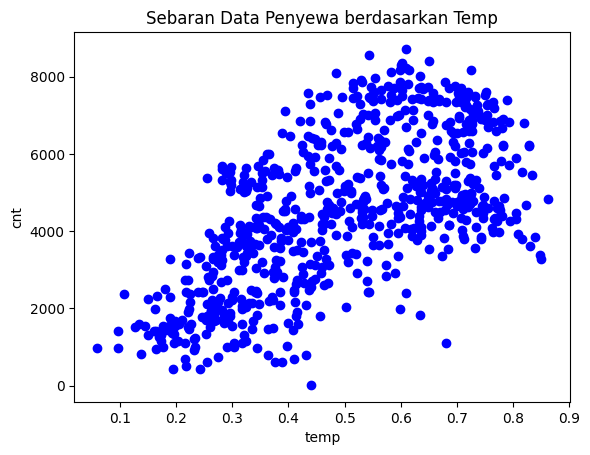

In [29]:
plt.scatter(df_day['temp'], df_day['cnt'], c='blue')
plt.title('Sebaran Data Penyewa berdasarkan Temp')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.show()

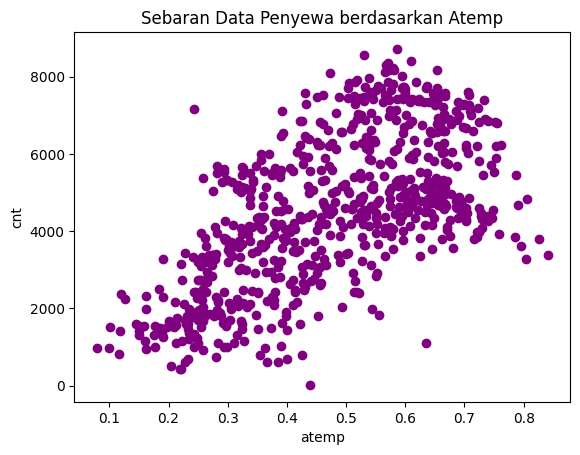

In [30]:
plt.scatter(df_day['atemp'],df_day['cnt'], c='purple')
plt.title('Sebaran Data Penyewa berdasarkan Atemp')
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.show()

### Pertanyaan 6: Bagaimana tingkat penyewaan sepeda di setiap jamnya?

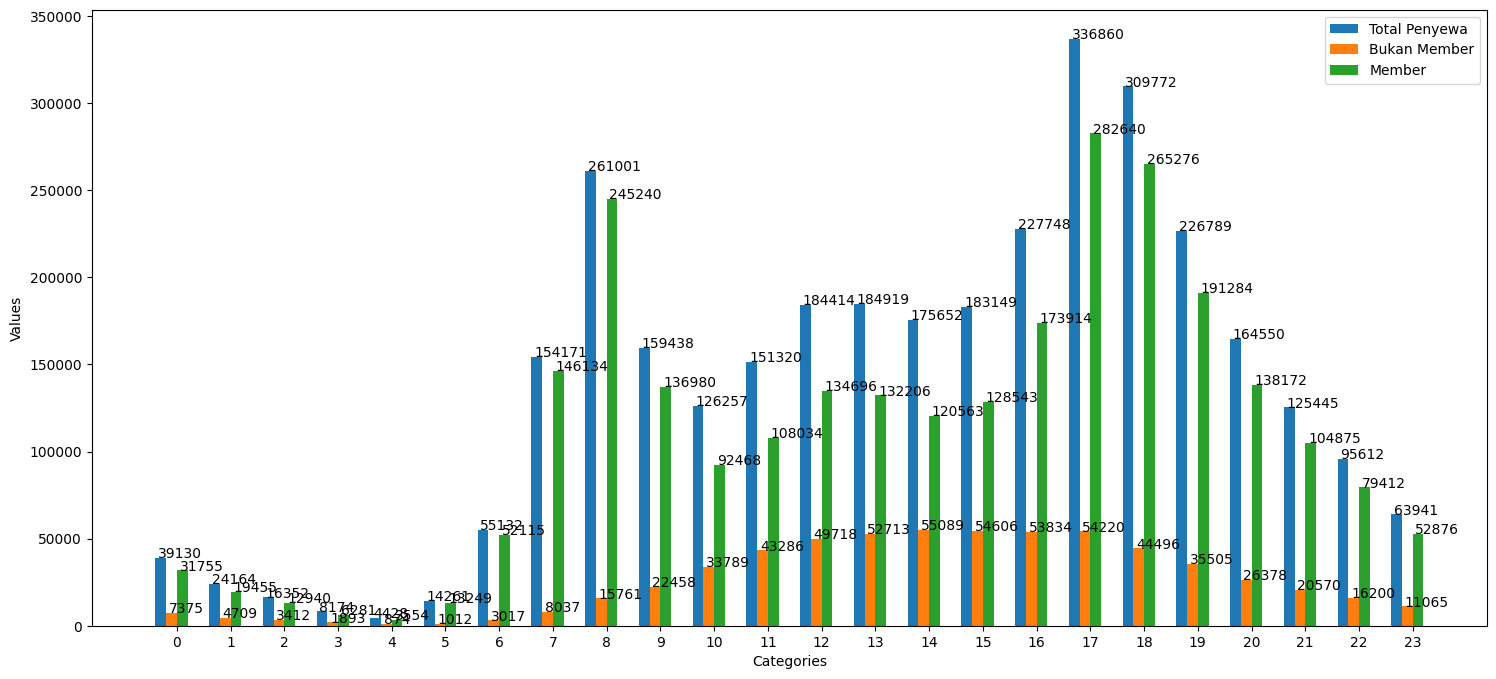

In [31]:
perjam = df_hour.groupby(by="hr").agg({"cnt": 'sum'})
notMember = df_hour.groupby(by="hr").agg({"casual": 'sum'})
Member = df_hour.groupby(by="hr").agg({"registered": 'sum'})
perjama = df_hour['hr'].unique()
kategori = df_hour['hr'].unique()
ListLabel = ['Total Penyewa', 'Bukan Member', 'Member']
nilai = np.array([perjam['cnt'], notMember['casual'], Member['registered']])
num_categories = len(kategori)
bar_width = 0.2
category_indices = np.arange(num_categories)

plt.figure(figsize=(18, 8))
for i, label in enumerate(ListLabel):
    plt.bar(category_indices + i * bar_width, nilai[i], bar_width, label=label)

plt.xlabel('Categories')
plt.ylabel('Values')

for i in range(num_categories):
    for j in range(len(ListLabel)):
        plt.text(category_indices[i] + j * bar_width - 0.05, nilai[j, i] + 1, str(nilai[j, i]))

plt.xticks(category_indices + 0.3, kategori)
plt.legend()
plt.show()

In [36]:
df_day.tail(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2012-12-31,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.5775,0.154846,439,2290,2729


In [37]:
df_hour.tail(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,,
2012-12-31,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


## Conclusion

- Conclution pertanyaan 1 : Berdasarkan data, dapat diketahui bahwa tingkat penyewa sepeda tertinggi ada pada musim gugur dan tingkat penyewaan sepeda terendah yaitu pada musim gugur. hal ini dapat menjadi pertimbangan untuk mempertambahan layanan penyewaan sepeda pada musim gugur.

- Conclution pertanyaan 2 : Total penyewaan sepeda pada hari kerja lebih tinggi, hal tersebut dikarenakan jumlah hari kerja yang lebih banyak daripada hari libur.
- Conclution pertanyaan 3 : Sebagian besar penyewa sepeda telah melakukan registrasi.
- Conclution pertanyaan 4 : Suhu mengalami peningkatan dari bulan ke-1 hingga puncaknya pada bulan ke 7. mulai bulan ke-8 suhu terus mengalami penurunan tiap bulannya hingga bulan ke-12. pada bulan ke-5 sampai dengan bulan ke-9 merupakan bulan dengan rata rata suhu tertinggi.
- Conclution pertanyaan 5 : Variabel yang  memiliki hubungan yang kuat dengan jumlah penyewa yaitu temperatur. hal tersebut dapat dilihat dari nilai korelasi tertinggi jika dibandingkan variabel yang lain. Kemudian jika dilihat dari sebaran data, dapat diketahui semakin besar suhu semakin besar pula jumlah penyewa sepeda.
- Conclution pertanyaan 6 : pada pukul 8, 17 dan 18 merupakan jam dengan tingkat penyewaan sepeda tertinggi. Pada pukul 8 sampai 16 jumlah penyewa cenderung fluktuatif, sedangkan setelah pukul 18 jumlah penyewa cenderung menurun. Pukul 13 sampai dengan 17 merupakan waktu favorit bukan member melakukan penyewaan sepeda.